In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns

In [ ]:
tr_x = '/content/drive/My Drive/NNFL/training_feature_matrix - Sheet1.csv'
tr_y = '/content/drive/My Drive/NNFL/training_output - Sheet1.csv'
ts_x = '/content/drive/My Drive/NNFL/test_feature_matrix - Sheet1.csv'
ts_y = '/content/drive/My Drive/NNFL/test_output - Sheet1.csv'

In [ ]:
xtr = pd.read_csv(tr_x, header = None).to_numpy()
ytr = pd.read_csv(tr_y, header = None).to_numpy()

xts = pd.read_csv(ts_x, header = None).to_numpy()
yts = pd.read_csv(ts_y, header = None).to_numpy()

In [ ]:
m1 = xtr.shape[0]
m2 = xts.shape[0]
ones_train = np.ones((m1, 1), dtype='float32')
ones_test = np.ones((m2, 1), dtype='float32')

In [ ]:
# normalization
def normalize(x1, x2):
  x = np.concatenate((x1, x2), axis=0)
  xmean = np.mean(x)
  xstd = np.std(x)
  ret = (x - xmean)/(xstd)  
  return ret

In [ ]:
X = normalize(xtr, xts)
Y = normalize(ytr, yts)

In [ ]:
x_train_data = np.concatenate((ones_train, X[:m1,:]), axis=1)
x_test_data = np.concatenate((ones_test, X[m1:m1+m2,:]), axis=1)
y_train_data = Y[:m1,:]
y_test_data = Y[m1:m1+m2,:]

In [ ]:
def signum(z):
  if (z < 0):
    return -1
  elif (z > 0):
    return 1
  else:
    return 0

In [ ]:
def eval_loss_and_gradient(w, x, y, ld):
  n = x.shape[0]
  p = np.dot(x, w) - y
  lossfnval = (1 / (2*n)) * np.dot(p.T, p)
  gradval = (1 / n) * np.dot(x.T, p)

  m = x.shape[1]

  for i in range(m):
    lossfnval  = lossfnval + (ld * abs(w[i]))

  for i in range(m):
    gradval[i]  = gradval[i] + (ld * signum(w[i]))

  return gradval, lossfnval

In [ ]:
# define hyperparameters
iterations = 6000
alpha = 0.01
w = np.random.randn(3, 1)
lambda_ = 0.1
losses = []
w1 = []
w2 = []
ws = []

In [ ]:
for it in range(iterations):
  grad, loss = eval_loss_and_gradient(w, x_train_data, y_train_data, lambda_)
  w = w - alpha*grad
  losses.append(loss)
  w1.append(w[1])
  w2.append(w[2])
  ws.append(w[1:])

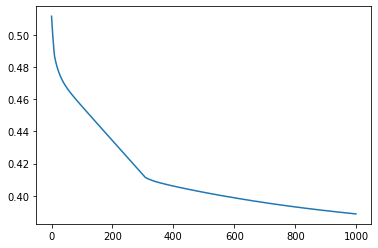

In [ ]:
plt.plot([i for i in range(iterations)][:1000], [los.flatten() for los in losses][:1000])

In [ ]:
losses[-1]

array([[0.38256918]])

In [ ]:
x_train_data.shape

(245, 3)

In [ ]:
y_pred = np.dot(x_test_data, w)

In [ ]:
n, m = y_pred.shape
mse_error = 0

for i in range(n):
  mse_error = mse_error + (y_pred[i] - y_test_data[i])**2

mse_error = (1.0/n)*(mse_error**(0.5))

In [ ]:
print("Mean Squared error = " + str(mse_error[0]))

Mean Squared error = 0.13317214719070608


In [ ]:
w_1 = [f[0].flatten()[0] for f in w1]
w_2 = [f[0].flatten()[0] for f in w2]
losses_1 = [l[0].flatten()[0] for l in losses]

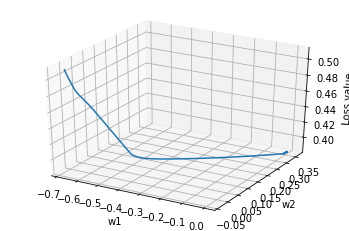

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# ax.set_zlim3d(1.2, 1.7)
# ax.set_ylim3d(-1.5, -0.5)

ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Loss value')

ax.plot(w_1, w_2, losses_1)
plt.show()